In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint 
import matplotlib.dates as mdates

In [14]:
url="https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/4f39b02b-47fe-4e66-95b6-e6da879c6910/download/conposcovidloc.geojson"
response=requests.get(url).json()


In [15]:
data=[]
for cases in response["features"]:
    data.append((cases["properties"]['ACCURATE_EPISODE_DATE'],cases["properties"]['Age_Group'],cases["properties"]['CLIENT_GENDER'],cases["properties"]['OUTCOME1'],cases["properties"]['Reporting_PHU_City']))

In [16]:
Ontario_cases_df=pd.DataFrame(data)
Ontario_cases_df.columns=["Date and Time","Age Group","Gender","Outcome","City"]
Ontario_cases_df

,Date and Time,Age Group,Gender,Outcome,City
0,2020-03-07T00:00:00,40s,MALE,Resolved,Toronto
1,2020-03-08T00:00:00,20s,MALE,Resolved,Toronto
2,2020-03-10T00:00:00,40s,FEMALE,Resolved,Toronto
3,2020-03-11T00:00:00,50s,FEMALE,Resolved,London
4,2020-03-12T00:00:00,30s,FEMALE,Resolved,Toronto
...,...,...,...,...,...
4721,2020-03-16T00:00:00,<20,MALE,Resolved,Cornwall
4722,2020-03-17T00:00:00,50s,MALE,Resolved,Cornwall
4723,2020-03-26T00:00:00,50s,MALE,Not Resolved,Newmarket
4724,2020-03-18T00:00:00,20s,MALE,Resolved,Hamilton


In [17]:
new=Ontario_cases_df["Date and Time"].str.split("T",n=1,expand=True)
Ontario_cases_df["Date"]=new[0]
Ontario_cases_df.drop(columns=["Date and Time"],inplace=True)

In [18]:
Ontario_cases_df.head()

,Age Group,Gender,Outcome,City,Date
0,40s,MALE,Resolved,Toronto,2020-03-07
1,20s,MALE,Resolved,Toronto,2020-03-08
2,40s,FEMALE,Resolved,Toronto,2020-03-10
3,50s,FEMALE,Resolved,London,2020-03-11
4,30s,FEMALE,Resolved,Toronto,2020-03-12


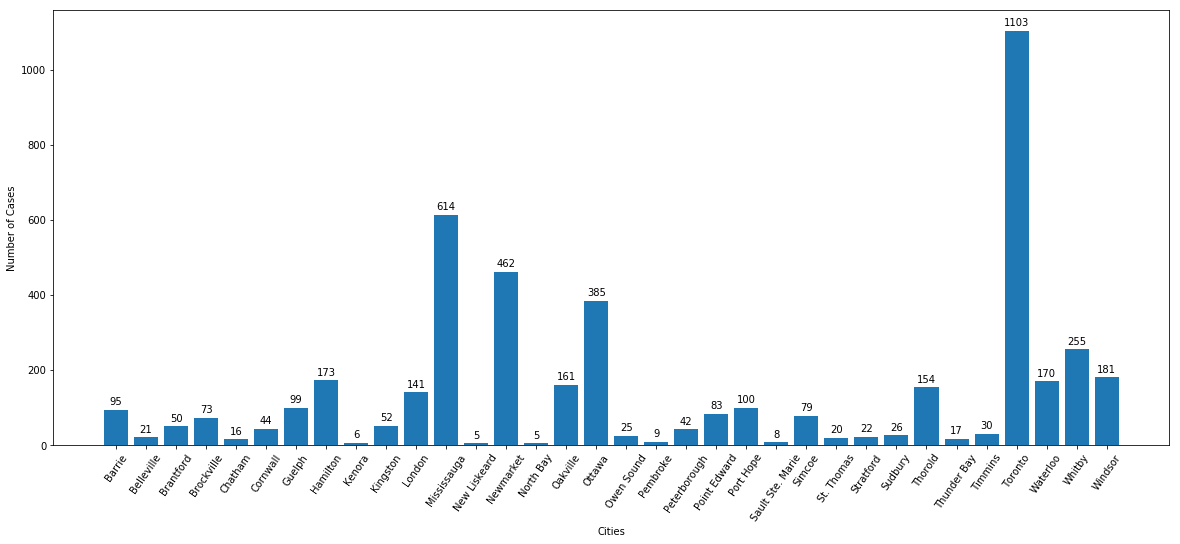

In [19]:
City_data_df=Ontario_cases_df.groupby(Ontario_cases_df["City"]).count()

fig, ax = plt.subplots(figsize=(20, 8))

bars=ax.bar(City_data_df.index,City_data_df["Age Group"])

ax.set_xlabel('Cities')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=55)


def autolabel(rects):

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(bars)
plt.show()

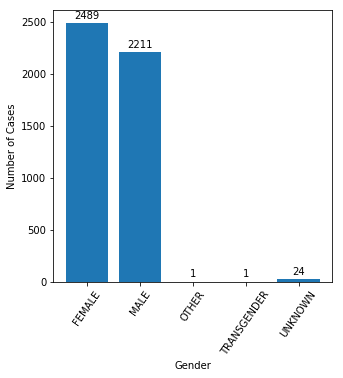

In [23]:
Gender_df=Ontario_cases_df.groupby("Gender").count()
Gender_df

fig, ax = plt.subplots(figsize=(5, 5))

bars=ax.bar(Gender_df.index,Gender_df["Age Group"])
autolabel(bars)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=55)
plt.show()


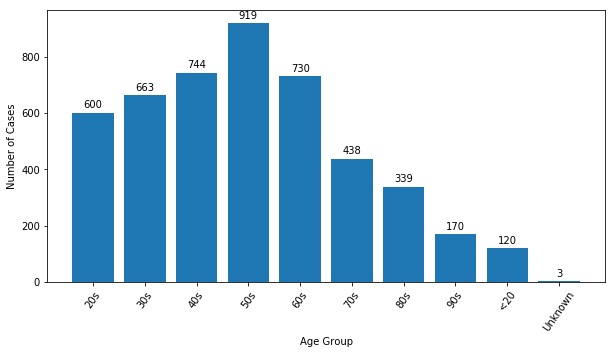

In [21]:
Age_df=Ontario_cases_df.groupby("Age Group").count()
fig, ax = plt.subplots(figsize=(10, 5))

bars=ax.bar(Age_df.index,Age_df["City"])

ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=55)
autolabel(bars)
plt.show()

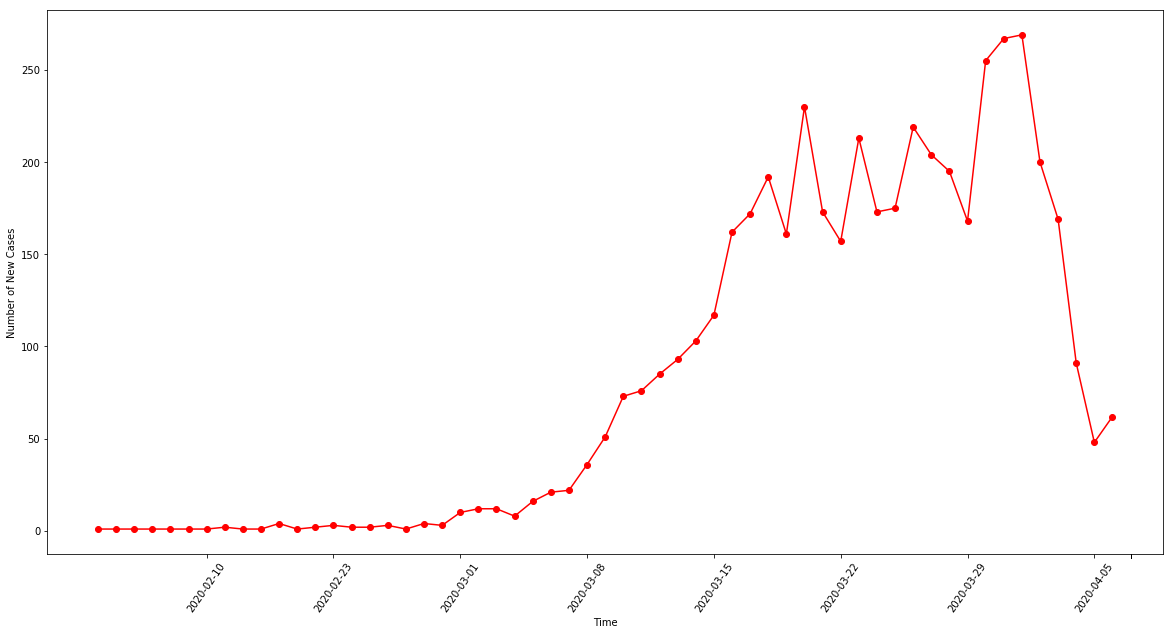

In [29]:
Total_cases_df=Ontario_cases_df.groupby("Date").count()

Total_resolved_df=Ontario_cases_df.groupby(["Date","Outcome"]).count()

a=Total_cases_df.reset_index()
ticks=[]
x=1

for tick in a["Date"]:
    if x%7==0:
        ticks.append(tick)
        x=x+1
    else:
        ticks.append("")
        x=x+1
ticks

fig, ax=plt.subplots(figsize=(20,10))


ax.plot(Total_cases_df.index,Total_cases_df["Age Group"],marker='o',color='r')

ax.set_xlabel('Time')
ax.set_ylabel('Number of New Cases')

plt.xticks(ticks,rotation=55)
plt.show()


In [30]:
Total_resolved_df

Age Group  Gender  City
Date       Outcome                              
2020-01-01 Resolved              1       1     1
2020-01-21 Resolved              1       1     1
2020-01-22 Resolved              1       1     1
2020-01-24 Resolved              1       1     1
2020-01-25 Resolved              1       1     1
...                            ...     ...   ...
2020-04-03 Not Resolved        165     165   165
2020-04-04 Fatal                 1       1     1
           Not Resolved         90      90    90
2020-04-05 Not Resolved         48      48    48
2020-04-06 Not Resolved         62      62    62

[118 rows x 3 columns]